In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import TimeSeriesSplit

In [68]:
df = pd.read_csv("C:\\Users\\gillp\\Desktop\\kAGGLE_1\\P1\\train.csv")

In [69]:
df.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2


In [70]:
df.shape

(2018352, 9)

In [71]:
filtered_df = df[df['is_consumption'] == 1]

In [72]:
filtered_df.shape

(1009176, 9)

In [73]:
df = filtered_df.reset_index(drop=True)

In [74]:
df.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
1,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
2,0,0,3,656.859,1,2021-09-01 00:00:00,0,5,2
3,0,1,0,59.000,1,2021-09-01 00:00:00,0,7,3
4,0,1,1,501.760,1,2021-09-01 00:00:00,0,9,4


In [75]:
df.isnull().sum()

county                  0
is_business             0
product_type            0
target                264
is_consumption          0
datetime                0
data_block_id           0
row_id                  0
prediction_unit_id      0
dtype: int64

In [76]:
df['target'] = df['target'].interpolate()

In [77]:
df['datetime'] = pd.to_datetime(df['datetime'])

# Create time-based features
df['day_of_week'] = df['datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['month'] = df['datetime'].dt.month
df['quarter'] = df['datetime'].dt.quarter
df['year'] = df['datetime'].dt.year
df['hour'] = df['datetime'].dt.hour
#df['minute'] = df['datetime'].dt.minute

In [78]:
df.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,day_of_week,month,quarter,year,hour
0,0,0,1,96.590,1,2021-09-01,0,1,0,2,9,3,2021,0
1,0,0,2,17.314,1,2021-09-01,0,3,1,2,9,3,2021,0
2,0,0,3,656.859,1,2021-09-01,0,5,2,2,9,3,2021,0
3,0,1,0,59.000,1,2021-09-01,0,7,3,2,9,3,2021,0
4,0,1,1,501.760,1,2021-09-01,0,9,4,2,9,3,2021,0


In [79]:
df.set_index('datetime', inplace=True)

In [80]:
# Define the number of lag features you want to create
num_lags = 7

# Create lag features
for i in range(1, num_lags + 1):
    df[f'target_lag_{i}'] = df['target'].shift(i)

# Display the DataFrame with lag features


In [81]:
df.head()

,county,is_business,product_type,target,is_consumption,data_block_id,row_id,prediction_unit_id,day_of_week,month,quarter,year,hour,target_lag_1,target_lag_2,target_lag_3,target_lag_4,target_lag_5,target_lag_6,target_lag_7
datetime,,,,,,,,,,,,,,,,,,,,
2021-09-01,0,0,1,96.590,1,0,1,0,2,9,3,2021,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-01,0,0,2,17.314,1,0,3,1,2,9,3,2021,0,96.590,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-01,0,0,3,656.859,1,0,5,2,2,9,3,2021,0,17.314,96.590,NaN,NaN,NaN,NaN,NaN
2021-09-01,0,1,0,59.000,1,0,7,3,2,9,3,2021,0,656.859,17.314,96.590,NaN,NaN,NaN,NaN
2021-09-01,0,1,1,501.760,1,0,9,4,2,9,3,2021,0,59.000,656.859,17.314,96.59,NaN,NaN,NaN


In [82]:
df = df.dropna()

In [83]:
df.head()

,county,is_business,product_type,target,is_consumption,data_block_id,row_id,prediction_unit_id,day_of_week,month,quarter,year,hour,target_lag_1,target_lag_2,target_lag_3,target_lag_4,target_lag_5,target_lag_6,target_lag_7
datetime,,,,,,,,,,,,,,,,,,,,
2021-09-01,1,0,3,22.841,1,0,15,7,2,9,3,2021,0,2.756,5155.056,501.760,59.000,656.859,17.314,96.590
2021-09-01,1,1,3,30.778,1,0,17,8,2,9,3,2021,0,22.841,2.756,5155.056,501.760,59.000,656.859,17.314
2021-09-01,2,0,3,23.444,1,0,19,9,2,9,3,2021,0,30.778,22.841,2.756,5155.056,501.760,59.000,656.859
2021-09-01,2,1,3,266.637,1,0,21,10,2,9,3,2021,0,23.444,30.778,22.841,2.756,5155.056,501.760,59.000
2021-09-01,3,0,1,14.964,1,0,23,11,2,9,3,2021,0,266.637,23.444,30.778,22.841,2.756,5155.056,501.760


In [84]:
columns_to_drop = ['row_id', 'data_block_id','county', 'prediction_unit_id','is_consumption']
df = df.drop(columns=columns_to_drop)

In [85]:
df.head()

,is_business,product_type,target,day_of_week,month,quarter,year,hour,target_lag_1,target_lag_2,target_lag_3,target_lag_4,target_lag_5,target_lag_6,target_lag_7
datetime,,,,,,,,,,,,,,,
2021-09-01,0,3,22.841,2,9,3,2021,0,2.756,5155.056,501.760,59.000,656.859,17.314,96.590
2021-09-01,1,3,30.778,2,9,3,2021,0,22.841,2.756,5155.056,501.760,59.000,656.859,17.314
2021-09-01,0,3,23.444,2,9,3,2021,0,30.778,22.841,2.756,5155.056,501.760,59.000,656.859
2021-09-01,1,3,266.637,2,9,3,2021,0,23.444,30.778,22.841,2.756,5155.056,501.760,59.000
2021-09-01,0,1,14.964,2,9,3,2021,0,266.637,23.444,30.778,22.841,2.756,5155.056,501.760


In [86]:
X  = df.drop('target',axis = 1)
y = df['target']

In [87]:
X.shape

(1009169, 14)

In [88]:
X_train, y_train = X[:800000], y[:800000]
X_val, y_val = X[800000:880000], y[800000:880000]
X_test, y_test = X[880000:960000], y[880000:960000]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((800000, 14), (800000,), (80000, 14), (80000,), (80000, 14), (80000,))

In [90]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error,r2_score
from xgboost import XGBRegressor

# Assuming you have X_train, X_test, y_train, y_test, and tscv defined

param_grid = {'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200,300,400,600]}

grid_search = GridSearchCV(XGBRegressor(), param_grid, scoring='neg_mean_squared_error', cv=tscv)
grid_result = grid_search.fit(X_train, y_train)

# Best hyperparameters from the grid search
best_params = grid_result.best_params_
print("Best Hyperparameters:", best_params)

# Create an XGBoost regressor with the best hyperparameters
best_xg_reg = XGBRegressor(**best_params)

# Fit the model to the training data
best_xg_reg.fit(X_train, y_train)

# Predictions on the test set
y_pred = best_xg_reg.predict(X_test)


Best Hyperparameters: {'max_depth': 5, 'n_estimators': 600}


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_true and y_pred are your true and predicted values
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')


MAE: 223.3481321380127
MSE: 191107.96415466524
RMSE: 437.15896897429116
R2 Score: 0.8739972871450489


In [ ]:
test_predictions = best_xg_reg.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

,Test Predictions,Actuals
datetime,,
2023-03-11 12:00:00,-30.415253,11.887
2023-03-11 12:00:00,549.828796,927.435
2023-03-11 12:00:00,383.299225,388.500
2023-03-11 12:00:00,706.760315,535.728
2023-03-11 12:00:00,5179.506348,4725.125
...,...,...
2023-05-01 10:00:00,350.407379,242.976
2023-05-01 10:00:00,303.613403,8.072
2023-05-01 10:00:00,3772.756836,3726.445


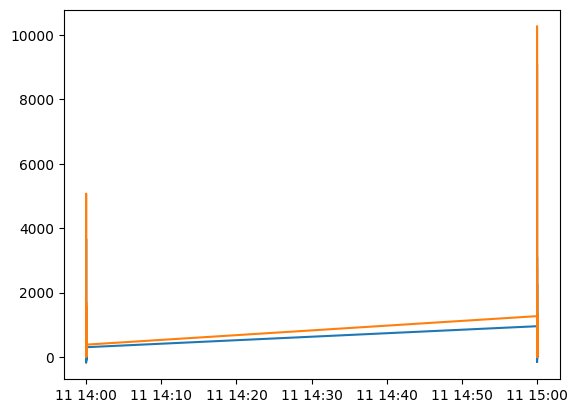

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test_results['Test Predictions'][100:200])
plt.plot(test_results['Actuals'][100:200])